In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv')
df


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [6]:
print(df.isnull().sum())

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


In [9]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [10]:
df.duplicated().sum()

0

array([[<Axes: title={'center': 'Happiness Rank'}>,
        <Axes: title={'center': 'Happiness Score'}>,
        <Axes: title={'center': 'Standard Error'}>],
       [<Axes: title={'center': 'Economy (GDP per Capita)'}>,
        <Axes: title={'center': 'Family'}>,
        <Axes: title={'center': 'Health (Life Expectancy)'}>],
       [<Axes: title={'center': 'Freedom'}>,
        <Axes: title={'center': 'Trust (Government Corruption)'}>,
        <Axes: title={'center': 'Generosity'}>],
       [<Axes: title={'center': 'Dystopia Residual'}>, <Axes: >,
        <Axes: >]], dtype=object)

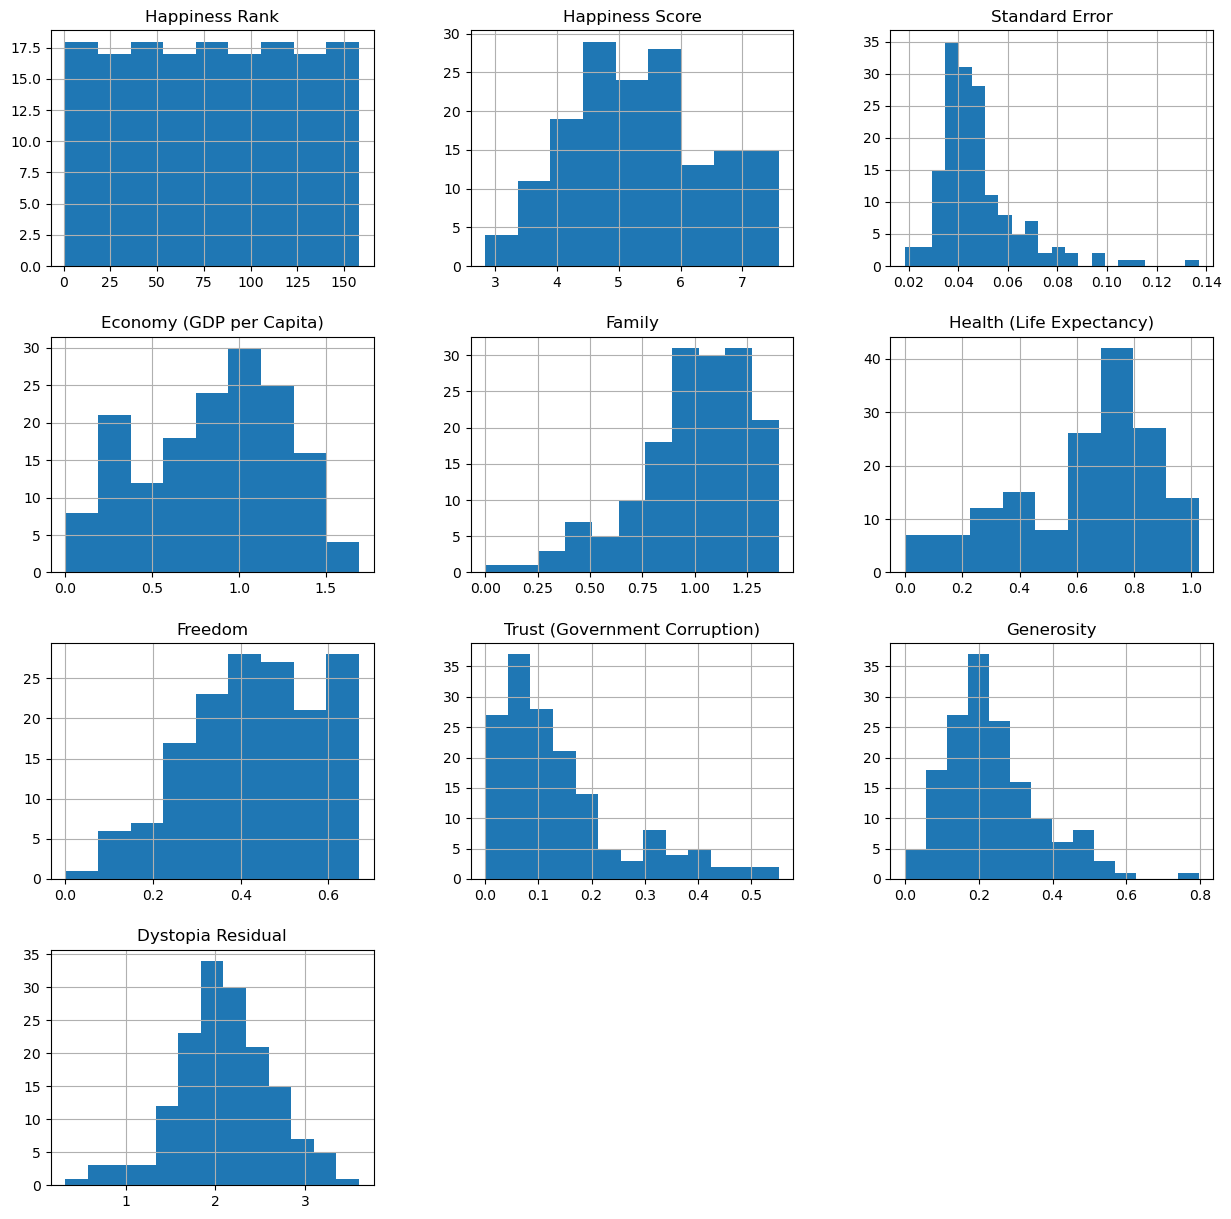

In [11]:
df.hist(bins='auto',figsize=(15,15))

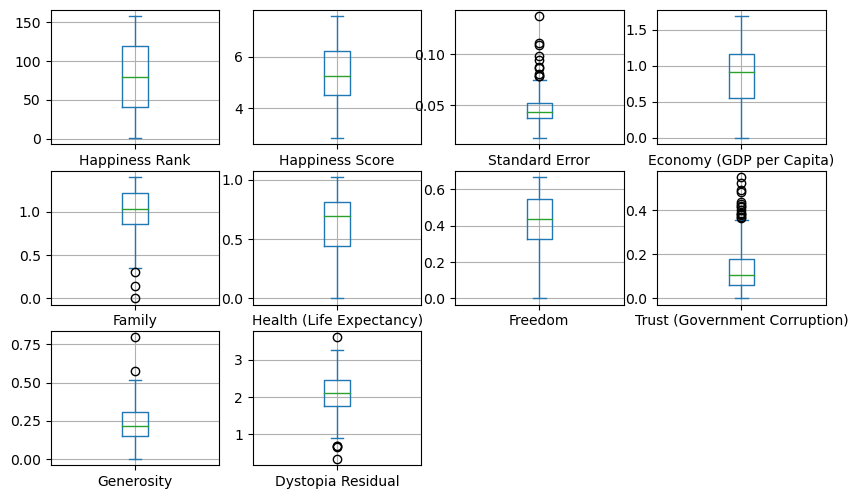

In [13]:
df[['Happiness Rank','Happiness Score','Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']].plot(kind='box', subplots=True, layout=(4,4), figsize=(10,8), grid=True);


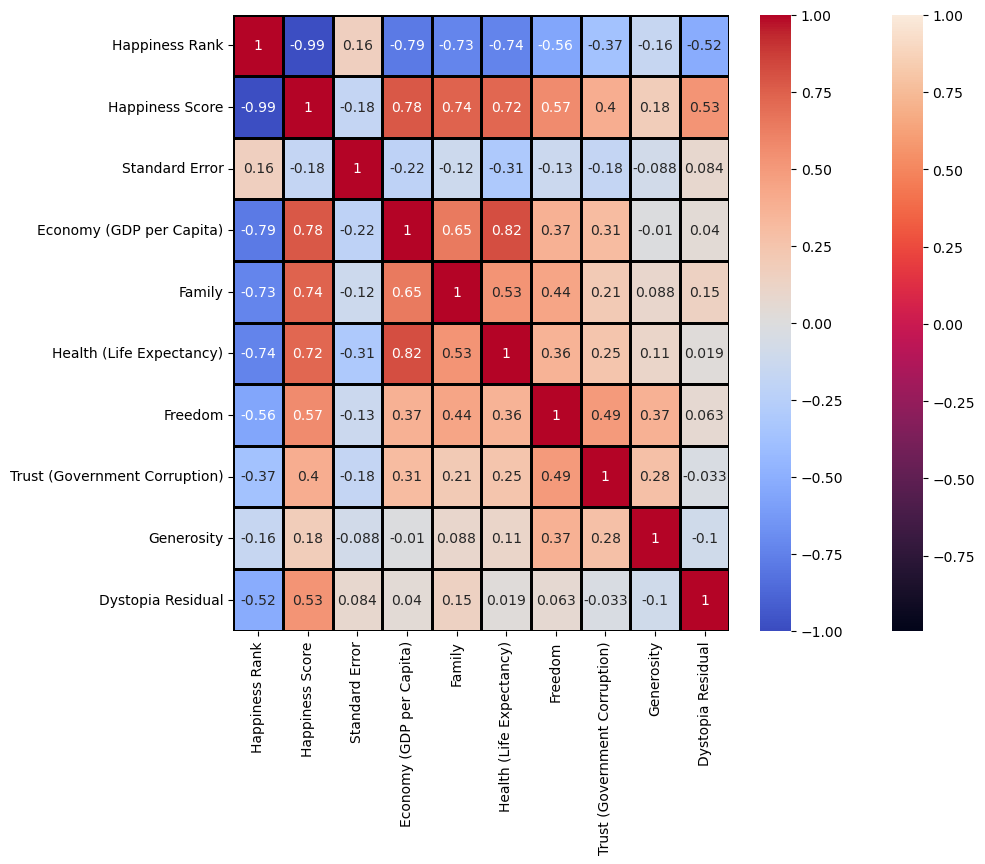

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,center=0,cmap='coolwarm',linewidth=1,linecolor='black')
plt.show()

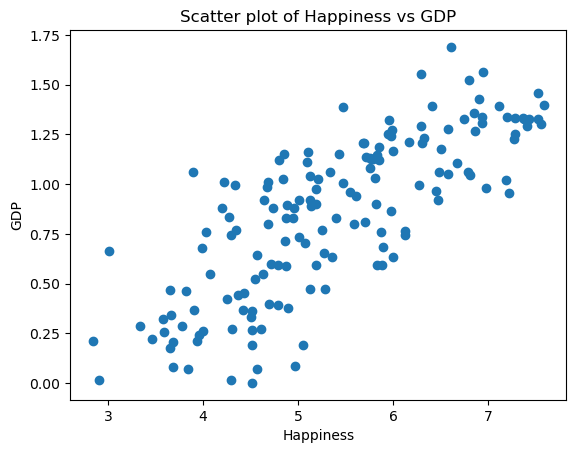

In [32]:
happiness_score=df['Happiness Score']
gdp=df['Economy (GDP per Capita)']

plt.scatter(happiness_score,gdp)
plt.title('Scatter plot of Happiness vs GDP')
plt.xlabel('Happiness')
plt.ylabel('GDP')
plt.show()

In [40]:
happy_countries=df[['Country','Happiness Rank']].groupby('Country').mean().sort_values(by='Happiness Rank',ascending=True)
happy_countries.head()

,Happiness Rank
Country,
Switzerland,1.0
Iceland,2.0
Denmark,3.0
Norway,4.0
Canada,5.0


In [43]:
sad_countries=df[['Country','Happiness Rank']].groupby('Country').mean().sort_values(by='Happiness Rank',ascending=True)
sad_countries.tail()

,Happiness Rank
Country,
Rwanda,154.0
Benin,155.0
Syria,156.0
Burundi,157.0
Togo,158.0


In [46]:
rich_countries=df[['Country','Economy (GDP per Capita)']].groupby('Country').mean().sort_values(by='Economy (GDP per Capita)',ascending=False)
rich_countries.head()

,Economy (GDP per Capita)
Country,
Qatar,1.69042
Luxembourg,1.56391
Kuwait,1.55422
Singapore,1.52186
Norway,1.45900


In [47]:
healthy_countries=df[['Country','Health (Life Expectancy)']].groupby('Country').mean().sort_values(by='Health (Life Expectancy)',ascending=False)
healthy_countries.head()

,Health (Life Expectancy)
Country,
Singapore,1.02525
Hong Kong,1.01328
Japan,0.99111
South Korea,0.96538
Spain,0.95562


In [55]:
unhealthy_countries=df[['Country','Health (Life Expectancy)']].groupby('Country').mean().sort_values(by='Health (Life Expectancy)',ascending=False)
unhealthy_countries.tail()

,Health (Life Expectancy)
Country,
Lesotho,0.07612
Swaziland,0.07566
Central African Republic,0.06699
Botswana,0.04776
Sierra Leone,0.00000


In [65]:
#My country happiness rank 
india=df[df.Country == 'India']
india

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
116,India,Southern Asia,117,4.565,0.02043,0.64499,0.38174,0.51529,0.39786,0.08492,0.26475,2.27513


In [ ]:
# We'll drop the Country variable because it's categorical, we'll also drop the happiness rank and year variable beacuse it's irrelevant to this model


### Modling and Prediction

In [7]:
new_df=df.drop(['Region','Country','Happiness Rank'],axis=1)
new_df.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
#I am taking 20 percent of the complete dataset for testing purpose and the remaing 80 percent with be used to train the model
X = df.drop(['Region','Country','Happiness Rank'],axis=1)
y = df['Happiness Score']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
scale=StandardScaler()
new_df=scale.fit_transform(new_df)

In [9]:
#Traning the algorithm

lm=LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [134]:
# comparing actual values with predicted values
y_pred = lm.predict(X_test)

actual_vs_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
actual_vs_pred 

,Actual,Predicted
7,7.364,7.364
44,5.995,5.995
113,4.633,4.633
120,4.514,4.514
63,5.716,5.716
122,4.507,4.507
121,4.512,4.512
139,3.956,3.956
109,4.686,4.686
92,5.007,5.007


In [135]:
#making a dataframe of the coeffiecients to help us easily determine which variable carries more weight

coefficient = lm.coef_

coefficient_df = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=['features', 'coefficients'])
coefficient_df             
                           

,features,coefficients
0,Happiness Score,1.000000e+00
1,Standard Error,3.832878e-15
2,Economy (GDP per Capita),-1.235868e-13
3,Family,-1.230620e-13
4,Health (Life Expectancy),-1.230800e-13
5,Freedom,-1.235062e-13
6,Trust (Government Corruption),-1.229810e-13
7,Generosity,-1.221521e-13
8,Dystopia Residual,-1.232289e-13


### Modle Evaluation

In [144]:
print('Root Mean Squared Error:', np.sqrt(MSE(y_test, y_pred)))

Root Mean Squared Error: 1.762424413785662e-15
